# Example 3 Down Jones


![title]("./wall-street-douglas.jpg")

In [1]:
from autoscraper import AutoScraper


url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

wanted_dict = {
    
    'Closing value': ['39.29', '41.03'],
    'Change in points': ['10.83','1.74'],
    'Change in percent': ['38.05','4.43']
}

scraper = AutoScraper()
scraper.build(url=url, wanted_dict=wanted_dict)



# get results grouped per rule so we'll know which one to use 
fg = scraper.get_result_similar(url, grouped=True)

In [3]:
import pandas as pd
df4 = pd.DataFrame(fg)

In [4]:
df4

,rule_wxia,rule_ls1i,rule_yu5k,rule_sa5b,rule_2h5r,rule_9gh8
0,39.29,39.29,10.83,10.83,38.05,38.05
1,41.03,41.03,1.74,1.74,4.43,4.43
2,37.58,37.58,−3.45,−3.45,−8.41,−8.41
3,39.39,39.39,1.81,1.81,4.82,4.82
4,41.56,41.56,2.17,2.17,5.51,5.51
...,...,...,...,...,...,...
131,"19,762.60","19,762.60","2,337.57","2,337.57",13.42,13.42
132,"24,719.22","24,719.22","4,956.62","4,956.62",25.08,25.08
133,"23,327.46","23,327.46","−1,391.76","−1,391.76",−5.63,−5.63
134,"28,538.44","28,538.44","5,210.98","5,210.98",22.34,22.34


In [6]:
df4 = df4.drop(["rule_ls1i","rule_sa5b","rule_9gh8"],axis =1)


In [7]:
df4.columns = ['Closing value','Change in points','Change in percent']

In [8]:
df4

,Closing value,Change in points,Change in percent
0,39.29,10.83,38.05
1,41.03,1.74,4.43
2,37.58,−3.45,−8.41
3,39.39,1.81,4.82
4,41.56,2.17,5.51
...,...,...,...
131,"19,762.60","2,337.57",13.42
132,"24,719.22","4,956.62",25.08
133,"23,327.46","−1,391.76",−5.63
134,"28,538.44","5,210.98",22.34


In [9]:
df4.insert(0,"Année",[i for i in range(1885,2021)])

In [10]:
df4

,Année,Closing value,Change in points,Change in percent
0,1885,39.29,10.83,38.05
1,1886,41.03,1.74,4.43
2,1887,37.58,−3.45,−8.41
3,1888,39.39,1.81,4.82
4,1889,41.56,2.17,5.51
...,...,...,...,...
131,2016,"19,762.60","2,337.57",13.42
132,2017,"24,719.22","4,956.62",25.08
133,2018,"23,327.46","−1,391.76",−5.63
134,2019,"28,538.44","5,210.98",22.34


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Année              136 non-null    int64 
 1   Closing value      136 non-null    object
 2   Change in points   136 non-null    object
 3   Change in percent  136 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


In [13]:
import re
def process_num(num):
    return float(re.sub(r'[^\w\s.]','',num))

In [14]:
df4["Closing value"] = df4["Closing value"].apply(process_num)

In [15]:
df4["Change in points"] = df4["Change in points"].apply(process_num)

In [16]:
df4["Change in percent"] = df4["Change in percent"].apply(process_num)

In [19]:
df4["Année"] = pd.to_datetime(df4["Année"])

In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Année              136 non-null    datetime64[ns]
 1   Closing value      136 non-null    float64       
 2   Change in points   136 non-null    float64       
 3   Change in percent  136 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 4.4 KB


<AxesSubplot:>

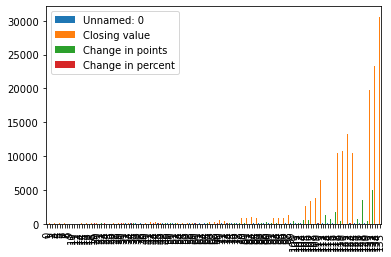

In [24]:
import pandas as pd
df4 = pd.read_csv('trade3.csv')
df4.plot.bar()

<AxesSubplot:>

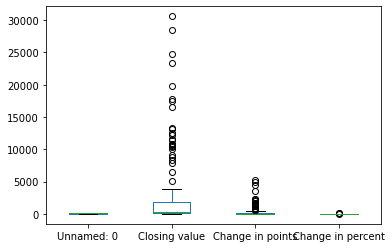

In [25]:
df4.plot.box()

In [ ]:
df4.to_csv('trade3.csv')